## 6.1. 종속성과 독립성
- 확률(probability)이란, 어떠한 사건의 공간에서 특정 사건이 선택될 때 발생하는 불확실성을 수치적으로 나타내는 것이다.
- 사건 E의 발생 여부가 사건 F의 발생 여부에 대한 정보(혹은 그 반대로)를 제공한다면 두 사건 E와 F는 종속 사건(Dependent events)으로 볼 수 있다. 그렇지 않다면 두 사건은 독립 사건(independent events)이다.
- 수학적으로, 사건 E와 F가 동시에 발생할 확률이 각각 사건이 발생할 확률의 곱과 같다면 두 사건은 독립 사건을 의미한다.<br>P(E,F) = P(E)P(F)

## 6.2. 조건부 확률
- 만약 두 사건이 독립 사건이라면 <br> P(E,F) = P(E)P(F) <br> 또, 두 사건이 반드시 독립 사건이라는 보장이 없고 사건 F의 확률이 0이 아닌 경우, 사건 E가 발생할 조건부 확률(conditional probability)은 다음과 같다. <br> P(E|F) = P(E,F)/P(F) <br> P(E,F) = P(E|F)P(F) <br> 따라서 사건 E와 F가 독립 사건이라면, 다음과 같은 식이 성립한다. <br> P(E|F) = P(E) <br> 사건 F가 발생해도 사건 E의 발생 여부에 대한 추가적인 정보를 알 수 없다는 것을 수학적으로 표현한 식이다.

In [2]:
import random 

def random_kid():
    return random.choice(['boy', 'girl'])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == 'girl':
        older_girl += 1
    if older == 'girl' and younger == 'girl':
        both_girls += 1
    if older == 'girl' or younger == 'girl':
        either_girl += 1
        
print('P(both | older):', both_girls / older_girl)  # 0.514 ~ 1/2
print('P(both | either):', both_girls / either_girl)  # 0.342 ~ 1/3

P(both | older): 0.5007089325501317
P(both | either): 0.3311897106109325


## 6.3. 베이즈 정리
- 조건부 확률을 '반대로 뒤집는' 베이즈 정리(Bayes's Theorem)

## 6.4. 확률변수
- 확률변수(random variable)란 특정 확률분포와 연관되어 있는 변수를 의미한다.

## 6.5. 연속 분포
- 동전 던지기는 각각의 결과에 확률을 계산해 주는 이산형 분포(discrete distribution)를 따른다. 하지만 대부분의 경우, 연속적인 결과에 대한 분포를 사용해서 모델을 만들 것이다. 예를 들어, 균등 분포(uniform distribution)는 0과 1 사이의 모든 값에 동등한 비중을 준 분포이다.
- 0과 1 사이에는 무한히 많은 숫자가 존재하기 때문에, 숫자 하나의 비중은 0일 것이다. 이러한 이유 때문에, 밀도함수를 특정 구간에서 적분한 값으로 확률을 나타내는 확률밀도함수(probability density function, pdf)로 연속 분포(continuous distribution)를 표현하겠다.
- 파이썬의 random.random()은 균등 분포를 따르는 일종의 확률변수이다.
- 확률변수의 값이 특정 값보다 작거나 클 확률을 나타내는 누적분포함수(cumulative distribution function, cdf)를 더 자주 사용할 것이다.

In [4]:
# 균등 분포의 확률밀도함수(pdf)
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

In [7]:
# 균등 분포에 대한 누적분포함수(cdf)
def uniform_cdf(x):
    '''균등분포를 따르는 확률변수의 값이 x보다 작거나 같을 확률을 반환'''
    if x < 0: return 0  # 균등분포의 확률은 절대로 0보다 작을 수 없음
    elif x < 1: return x  # 예시: P(X <= 0.4) = 0.4
    else: return 1  # 균등분포의 확률은 항상 1보다 작음  

## 6.6. 정규분포
- 정규분포(normal distribution)는 모든 분포들의 왕이다.!!
- 정규분포는 그 유명한 종형 곡선 모양의 분포이며, 평균인 𝜇(뮤)와 표준편차 𝜎(시그마)의 두 파라미터로 정의된다.
- 평균은 종의 중심이 어디인지를 나타내며, 표준편차는 종의 폭이 얼마나 넓은지를 나타낸다.
- 표준정규분포(standard normal distribution)는 𝜇=0이고 𝜎=1인 정규분포를 의미한다.

In [12]:
# 정규분포의 밀도함수 
import math

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2)) / (sqrt_two_pi * sigma)

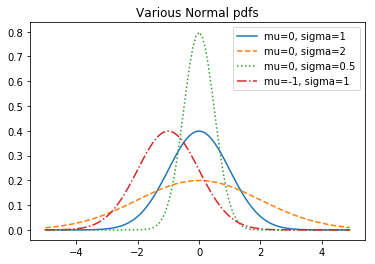

In [13]:
from matplotlib import pyplot as plt

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend()
plt.title('Various Normal pdfs')
plt.show()

In [15]:
# 정규분포의 누적분포함수
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

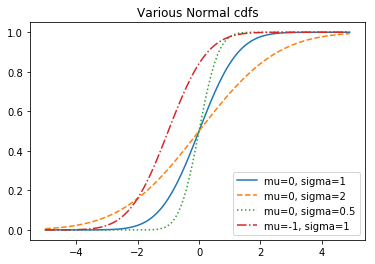

In [16]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend(loc=4)  # 우측 하단
plt.title('Various Normal cdfs')
plt.show()

In [17]:
# 가끔씩 특정 확률을 갖는 확률변수의 값을 찾기 위해, normal_cdf의 역함수가 필요할 수도 있다.
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    '''이진 검색을 사용해서 역함수를 근사'''
    # 표준정규분포가 아니라면 표준정규분포로 변환
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0  # normal_cdf(-10)는 0에 근접
    hi_z, hi_p = 10.0, 1  # normal_cdf(10)는 1에 근접
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2  # 중간 값
        mid_p = normal_cdf(mid_z)  # 중간 값의 누적분포 값을 계산
        if mid_p < p:
            # 중간 값이 너무 작다면 더 큰 값들을 검색
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # 중간 값이 너무 크다면 더 작은 값들을 검색
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    return mid_z

# 위의 함수는 원하는 확률 값에 가까워질 때까지 표준정규분포의 구간을 반복적으로 이등분한다.

## 6.7. 중심극한정리
- 중심극한정리(central limit theorem)란 동일한 분포에 대한 독립적인 확률변수의 평균을 나타내는 확률변수가 대략적으로 정규분포를 따른다는 정리이다.
- 이항 확률변수(binomial random variable)는 n과 p 두 가지 파라미터로 구성되어 있다. 단순히 n개의 독립적인 베르누이 확률변수(Bernoulli random variable)를 더한 것이다. 각 베르누이 확률변수의 값은 p의 확률로 1, 1-p의 확률로 0이 된다.

In [18]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

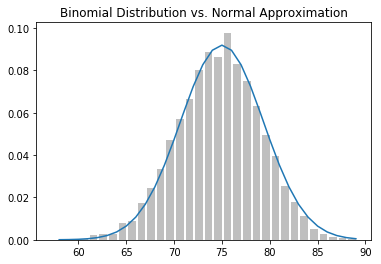

In [27]:
from matplotlib import pyplot as plt

def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    
    # 이항분포의 표본을 막대 그래프로 표현
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
           [v / num_points for v in histogram.values()],
           0.8,
           color = '0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    # 근사된 정규분포를 라인 차트로 표현
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
         for i in xs]
    plt.plot(xs, ys)
    plt.title('Binomial Distribution vs. Normal Approximation')
    plt.show()
    
make_hist(0.75, 100, 10000)

## 6.8. 더 공부해 보고 싶다면
- scipy.stats는 대부분의 유명한 확률분포의 확률밀도함수와 누적분포함수를 구현해놓았다.
- 확률론 교과서 : Introduction to Probability